<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib
!pip install seaborn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-06-13 21:47:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.8MB/s    in 2.5s    

2025-06-13 21:47:41 (60.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



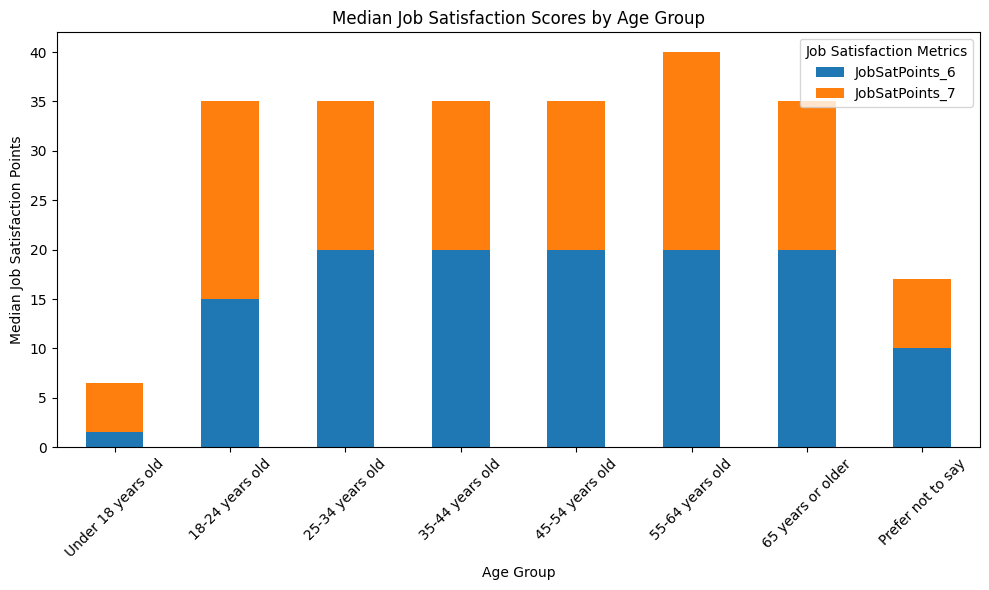

In [7]:
##Write your code here

# Drop rows with missing job satisfaction or age
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by Age and calculate median for JobSatPoints_6 and JobSatPoints_7
median_scores = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort age groups logically if needed
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
median_scores = median_scores.reindex(age_order)

# Plot stacked bar chart
ax = median_scores.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Median Job Satisfaction Scores by Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction Metrics')
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_4848/2373517839.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


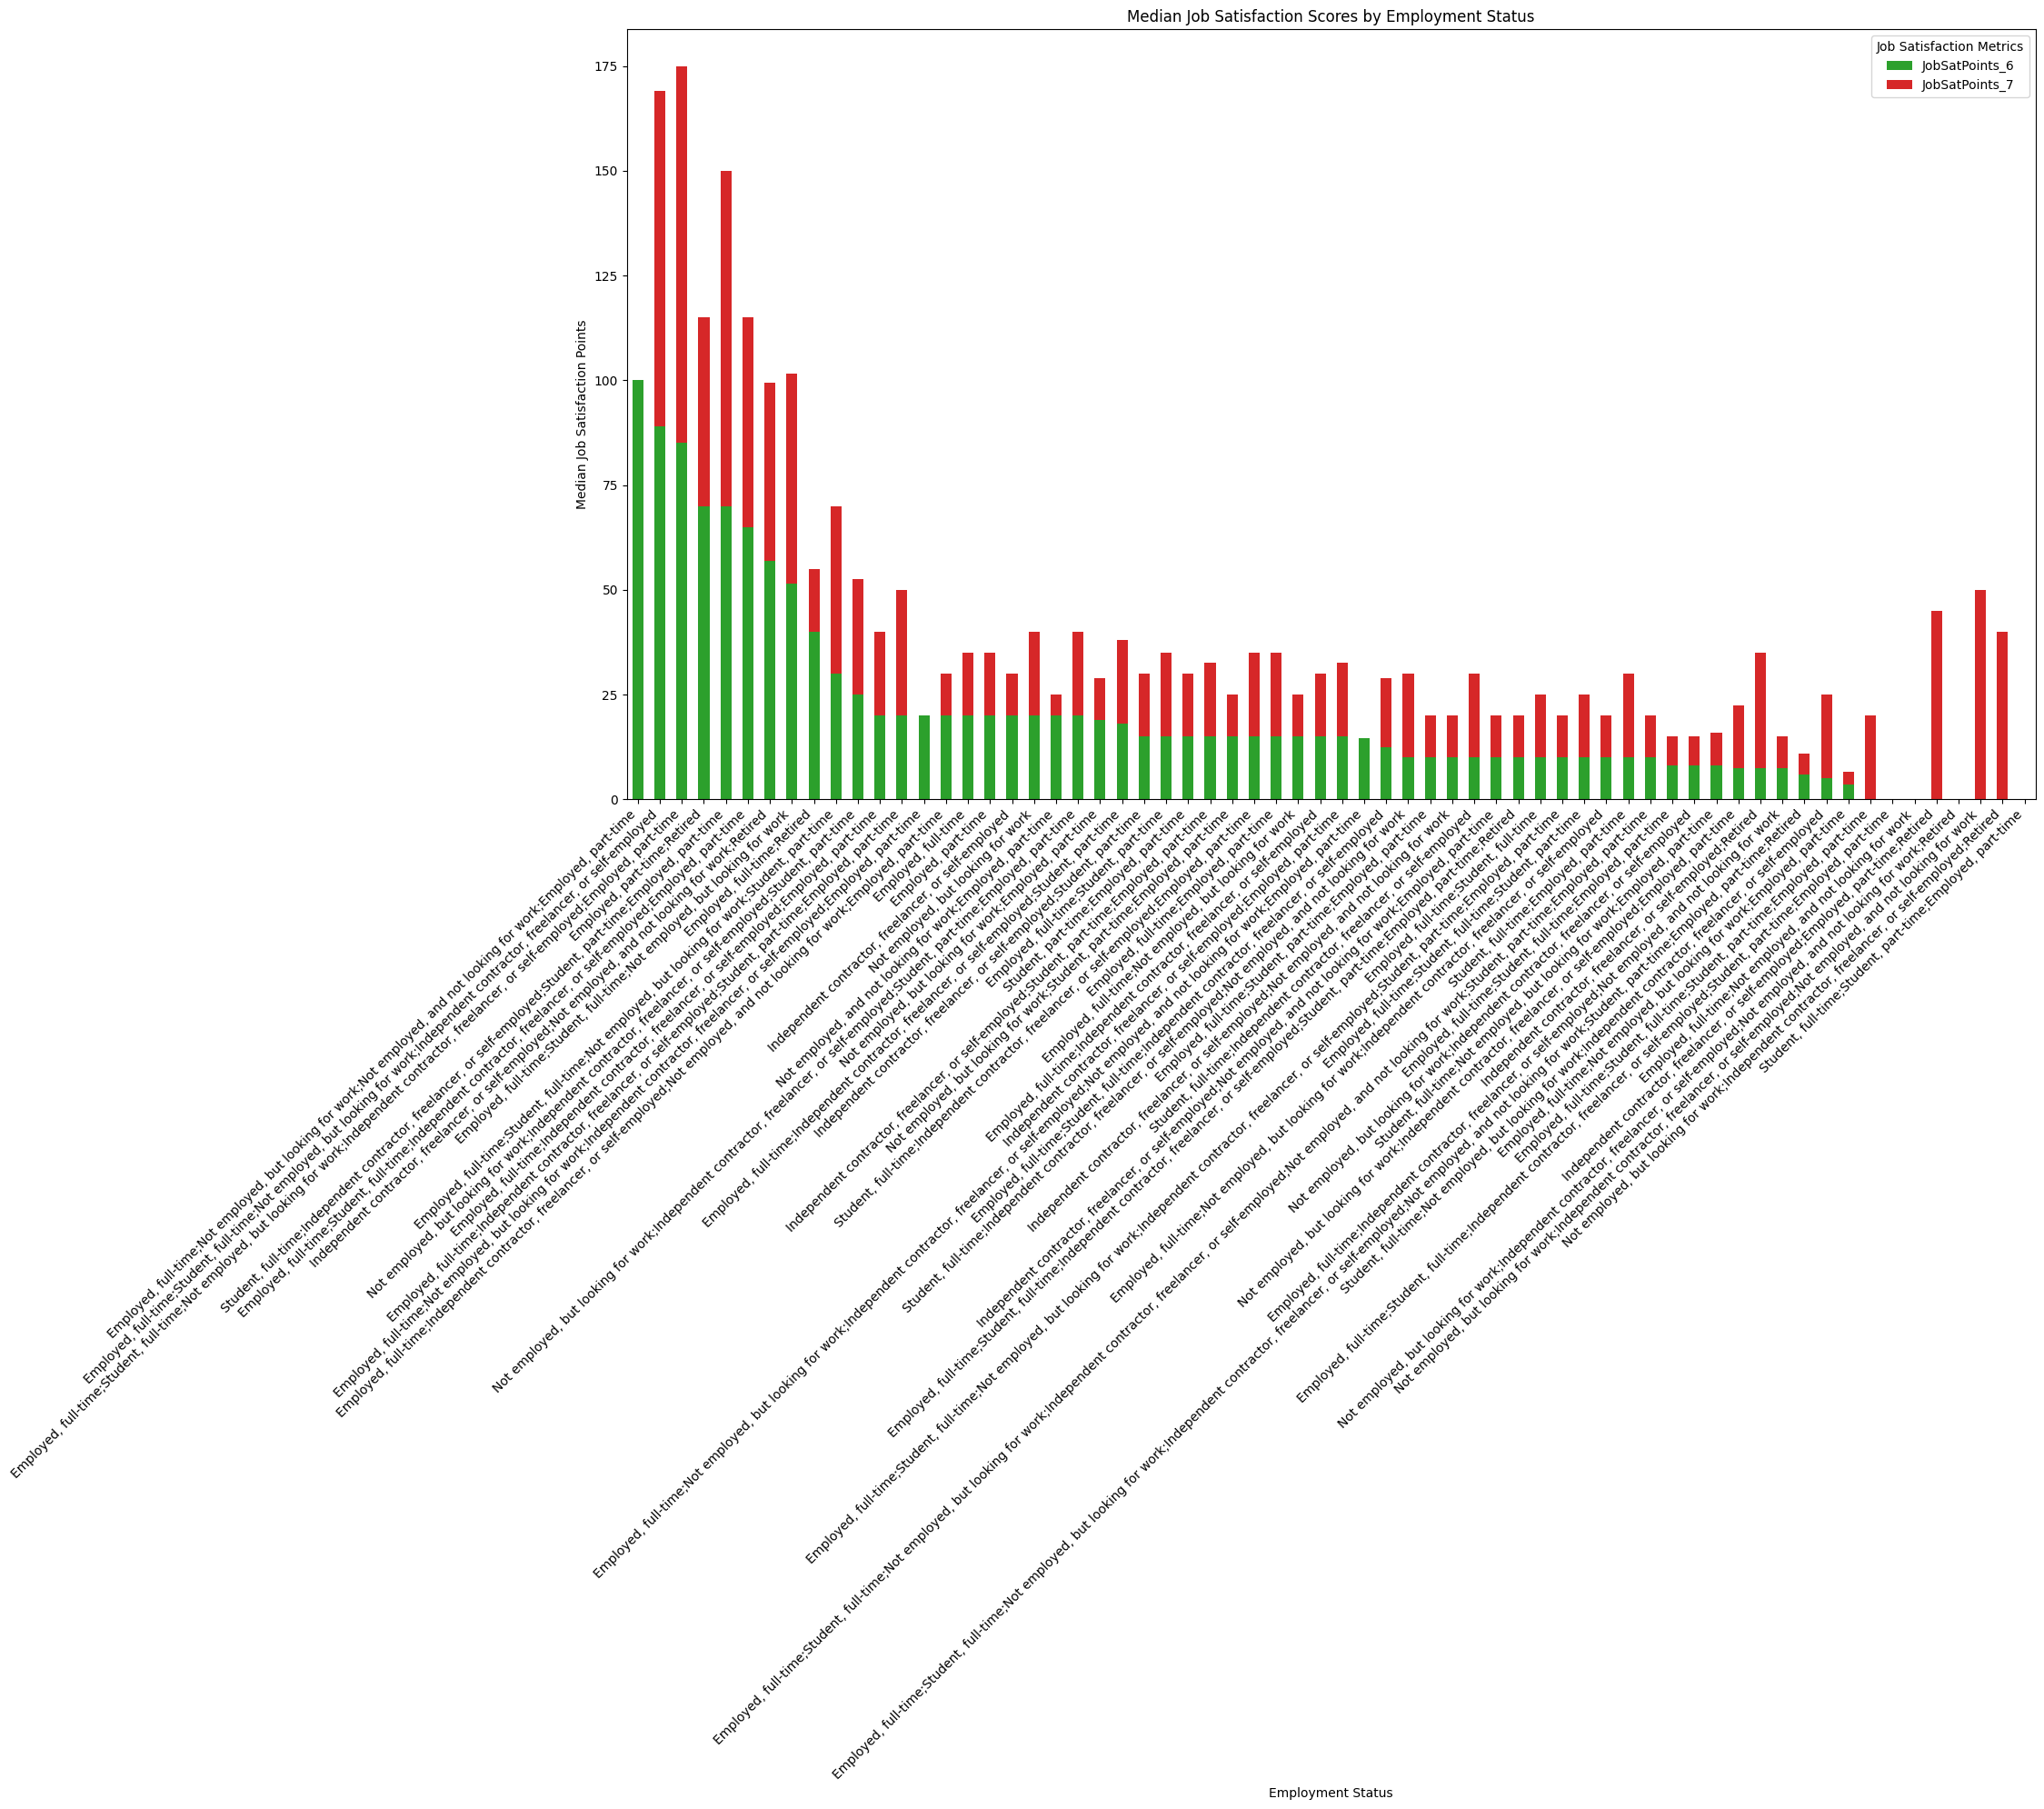

In [10]:
##Write your code here

# Drop rows with missing Employment or JobSatPoints columns
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by Employment and calculate median for JobSatPoints_6 and JobSatPoints_7
median_scores = df_clean.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort Employment categories if desired (optional)
median_scores = median_scores.sort_values(by='JobSatPoints_6', ascending=False)

# Plot stacked bar chart
ax = median_scores.plot(kind='bar', stacked=True, figsize=(20, 11), color=['#2ca02c', '#d62728'])

plt.title('Median Job Satisfaction Scores by Employment Status')
plt.ylabel('Median Job Satisfaction Points')
plt.xlabel('Employment Status')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction Metrics')
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


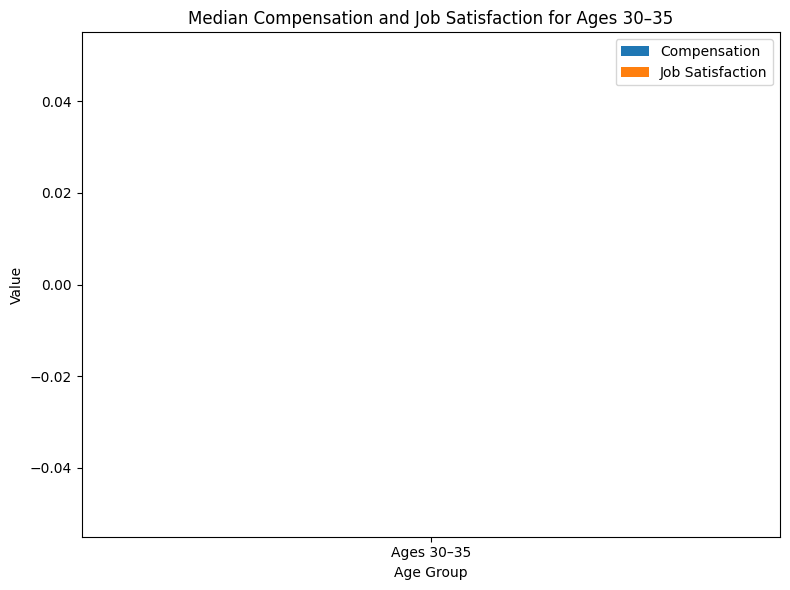

In [11]:
##Write your code here

# First, map 'Age' to numeric midpoint values to filter age 30-35
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Filter for respondents aged between 30 and 35
df_filtered = df[
    (df['AgeNumeric'] >= 30) &
    (df['AgeNumeric'] <= 35) &
    (df['ConvertedCompYearly'].notnull()) &
    (df['JobSatPoints_6'].notnull())
]

# Create one group for this range
data = {
    'Compensation': df_filtered['ConvertedCompYearly'].median(),
    'Job Satisfaction': df_filtered['JobSatPoints_6'].median()
}

# Convert to DataFrame for plotting
df_plot = pd.DataFrame(data, index=['Ages 30–35'])

# Plot stacked bar chart
df_plot.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Median Compensation and Job Satisfaction for Ages 30–35')
plt.ylabel('Value')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


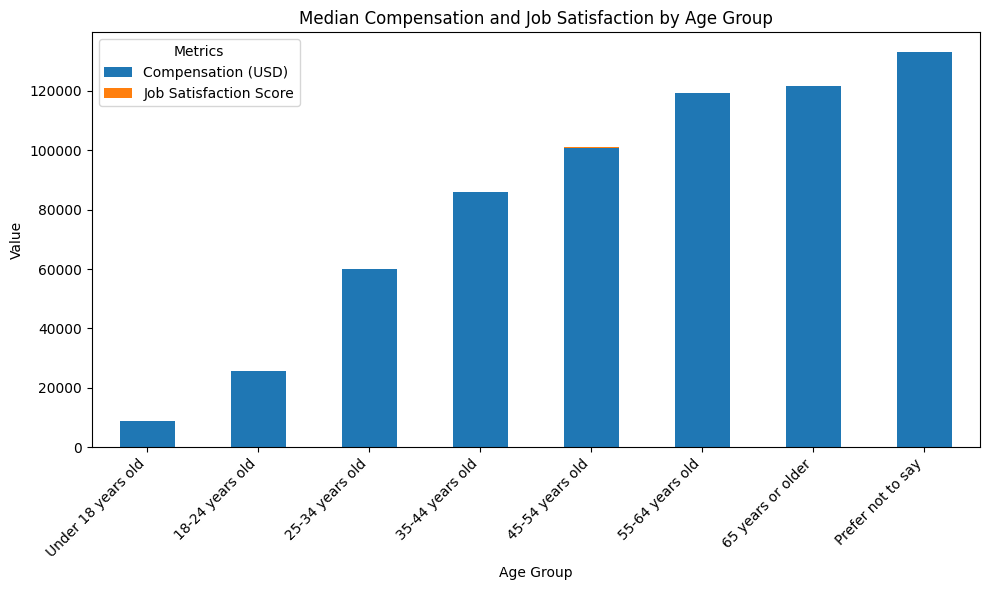

In [12]:
##Write your code 

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Group by Age and calculate median compensation and job satisfaction
median_by_age = df_clean.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Sort by typical age order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]
median_by_age = median_by_age.reindex(age_order)

# Plot stacked bar chart
median_by_age.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Median Compensation and Job Satisfaction by Age Group')
plt.ylabel('Value')
plt.xlabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.legend(['Compensation (USD)', 'Job Satisfaction Score'], title='Metrics')
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


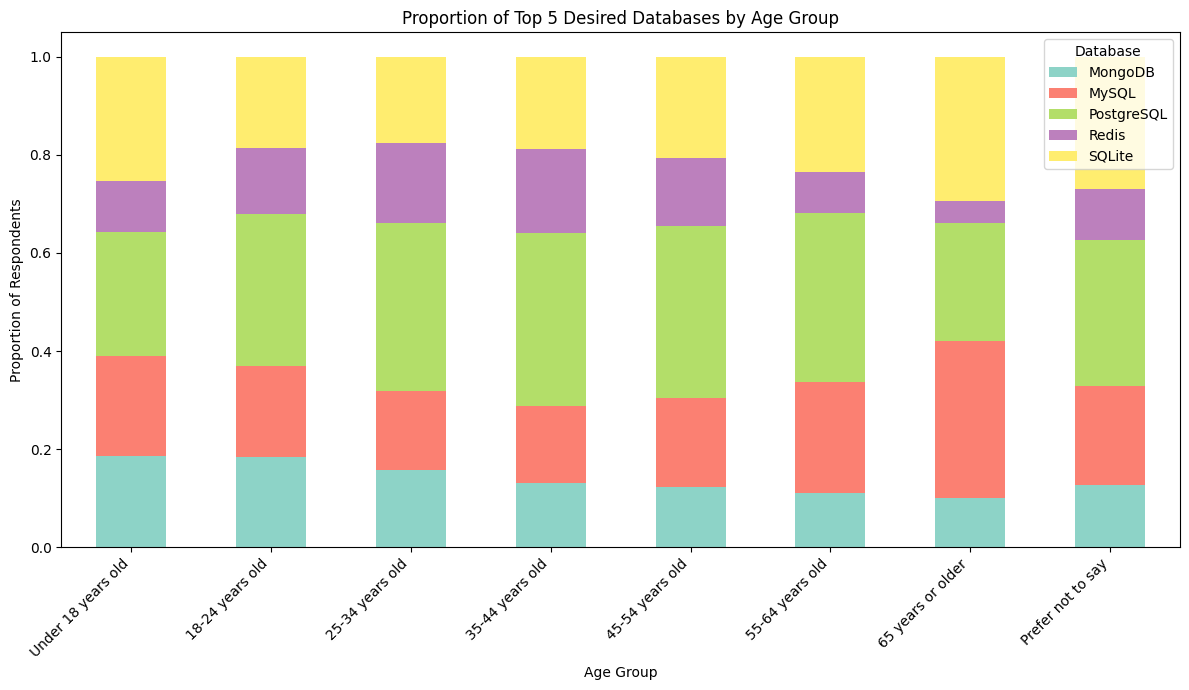

In [14]:
##Write your code here

# Load dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Drop rows with missing Age or DatabaseWantToWorkWith
df_clean = df.dropna(subset=['Age', 'DatabaseWantToWorkWith'])

# Split multiple database entries into separate rows
df_exploded = df_clean.assign(
    DatabaseWantToWorkWith=df_clean['DatabaseWantToWorkWith'].str.split(';')
).explode('DatabaseWantToWorkWith')

# Count top 5 most-wanted databases overall
top_databases = df_exploded['DatabaseWantToWorkWith'].value_counts().nlargest(5).index

# Filter to keep only top 5 databases
df_top = df_exploded[df_exploded['DatabaseWantToWorkWith'].isin(top_databases)]

# Create a crosstab: counts of each database per age group
crosstab = pd.crosstab(
    df_top['Age'], df_top['DatabaseWantToWorkWith']
)

# Normalize to show proportions (i.e., percent within each age group)
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)

# Sort age groups logically
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]
crosstab_prop = crosstab_prop.reindex(age_order)

# Plot the stacked bar chart
crosstab_prop.plot(
    kind='bar', stacked=True, figsize=(12, 7), colormap='Set3'
)

plt.title('Proportion of Top 5 Desired Databases by Age Group')
plt.ylabel('Proportion of Respondents')
plt.xlabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Database')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_4848/8120332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['JobSatPoints_6'] = df_clean['JobSatPoints_6'].astype(int)
/tmp/ipykernel_4848/8120332.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


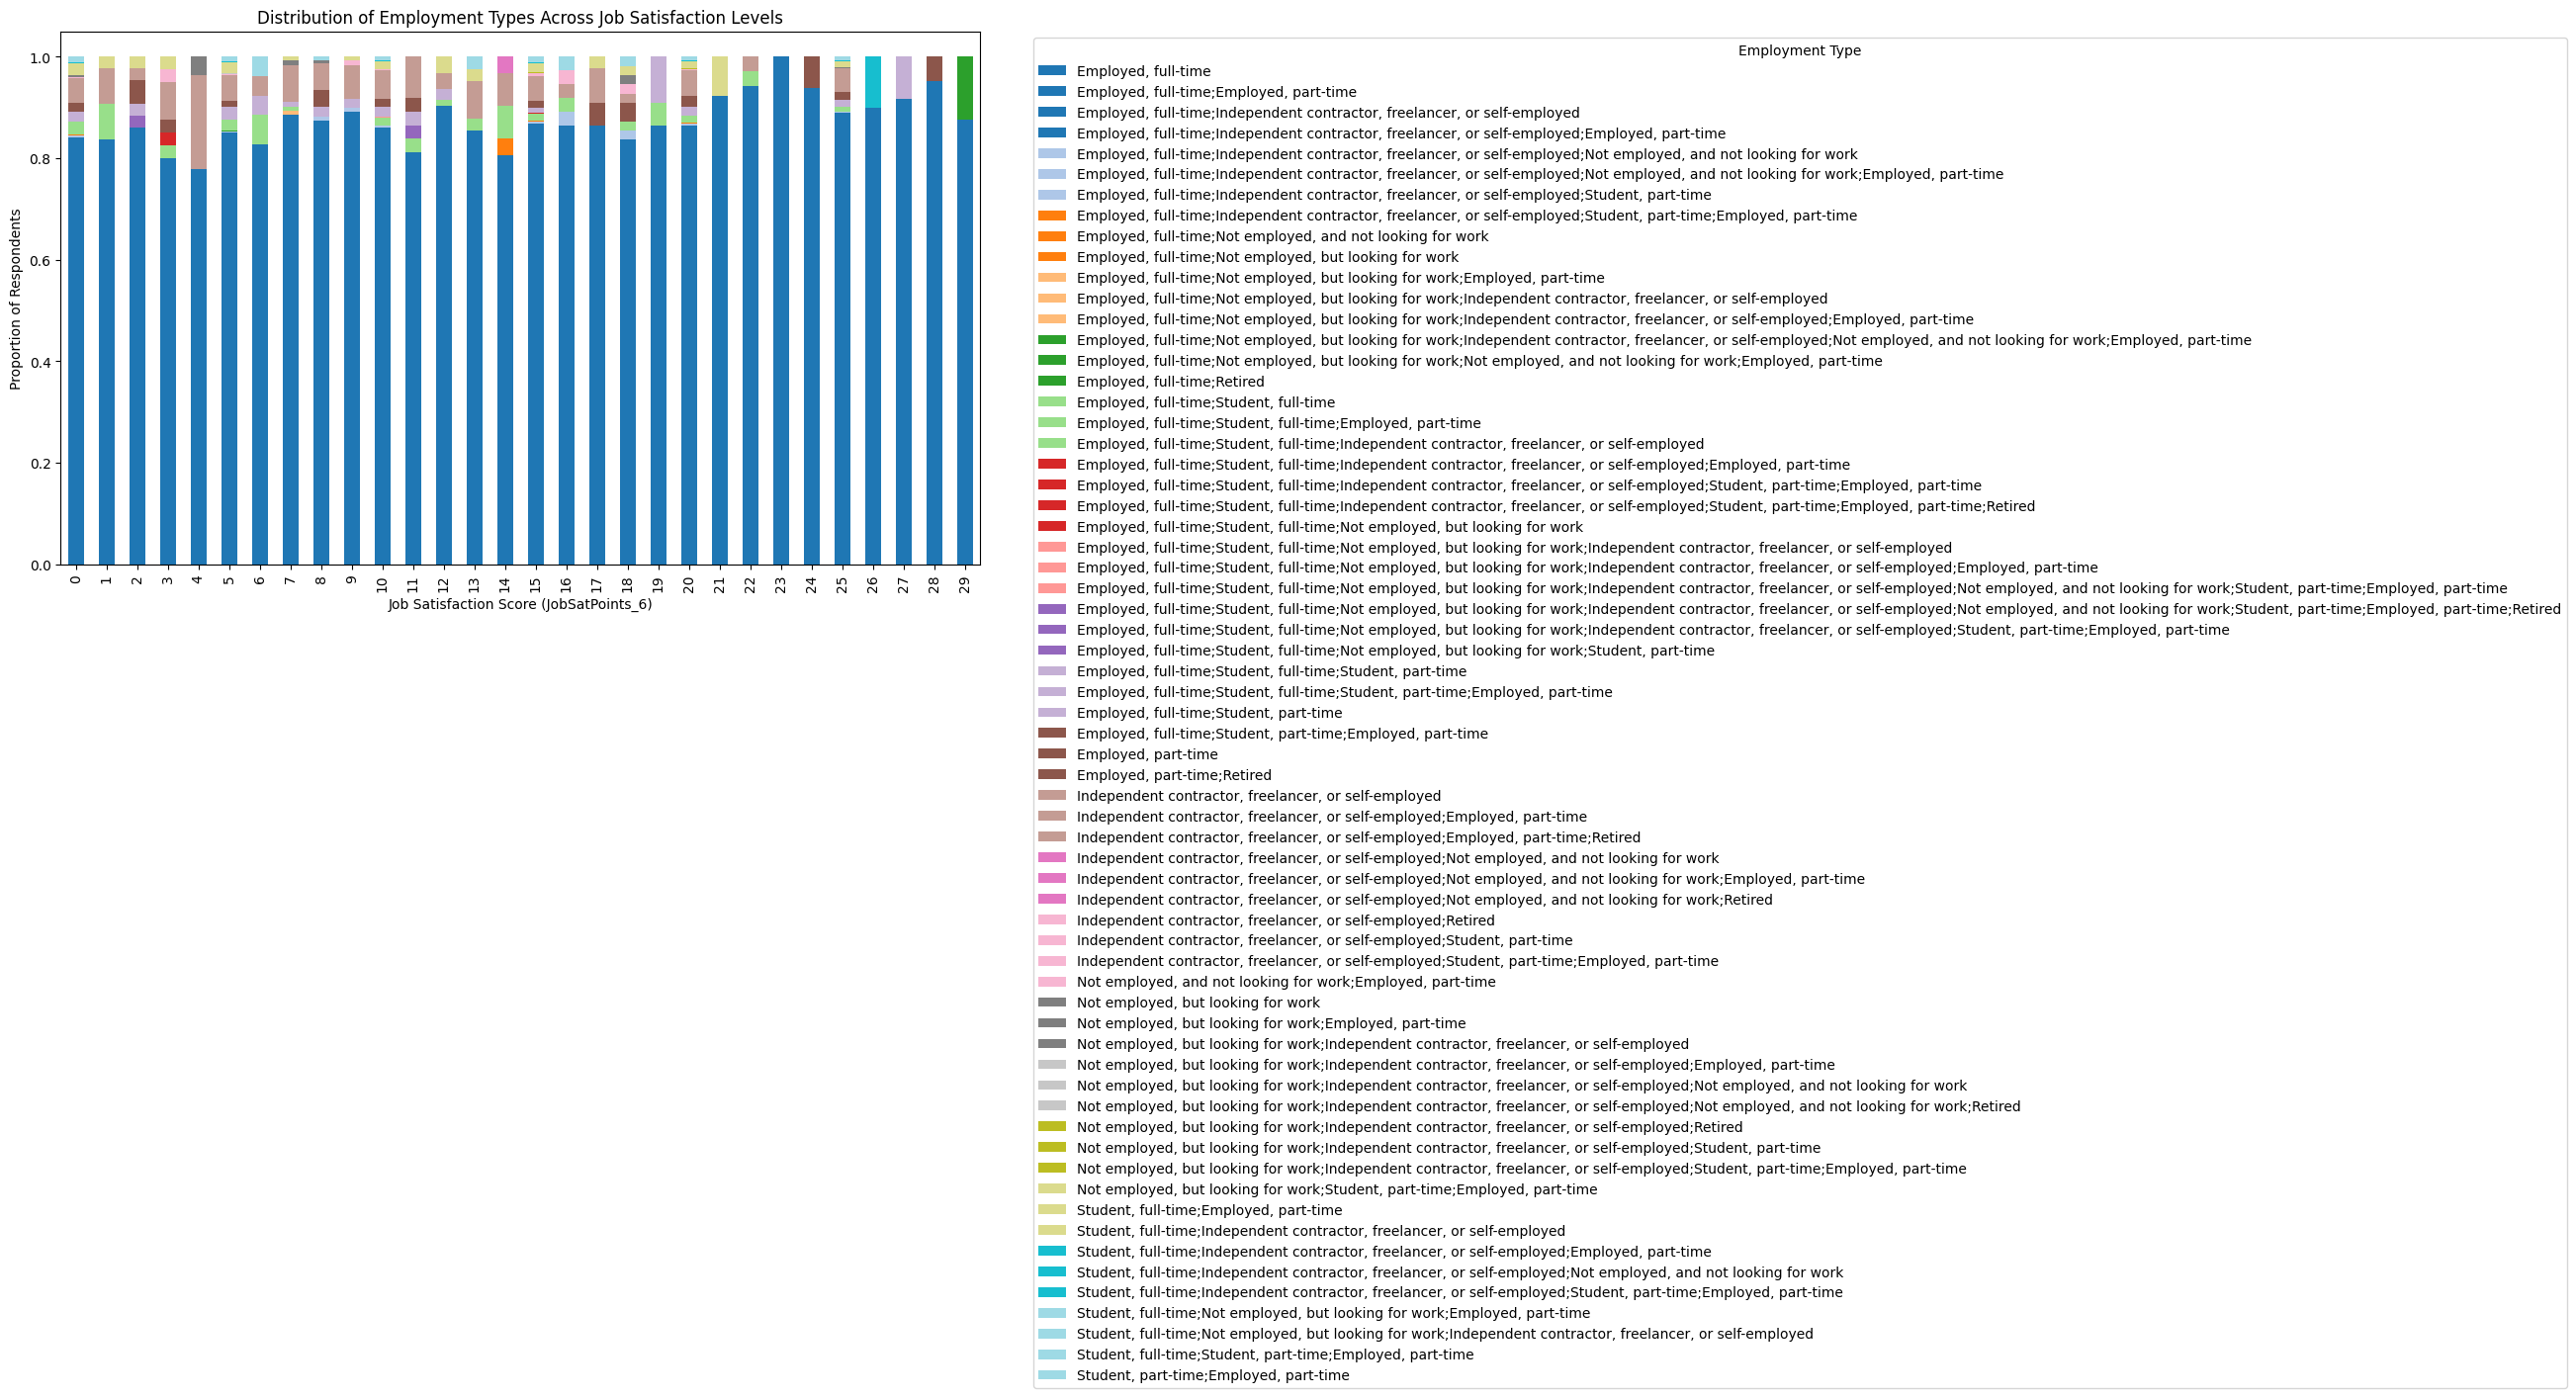

In [16]:
##Write your code here

# Drop rows with missing values in Employment or JobSatPoints_6
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6'])

# Convert JobSatPoints_6 to integer if it's not already
df_clean['JobSatPoints_6'] = df_clean['JobSatPoints_6'].astype(int)

# Create a crosstab of JobSatPoints_6 vs Employment
crosstab = pd.crosstab(df_clean['JobSatPoints_6'], df_clean['Employment'])

# Normalize the rows to get proportions within each satisfaction level
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)

#Lets take the first 30 rows
crosstab_prop = crosstab_prop.head(30)

# Plot stacked bar chart
crosstab_prop.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Distribution of Employment Types Across Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Score (JobSatPoints_6)')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


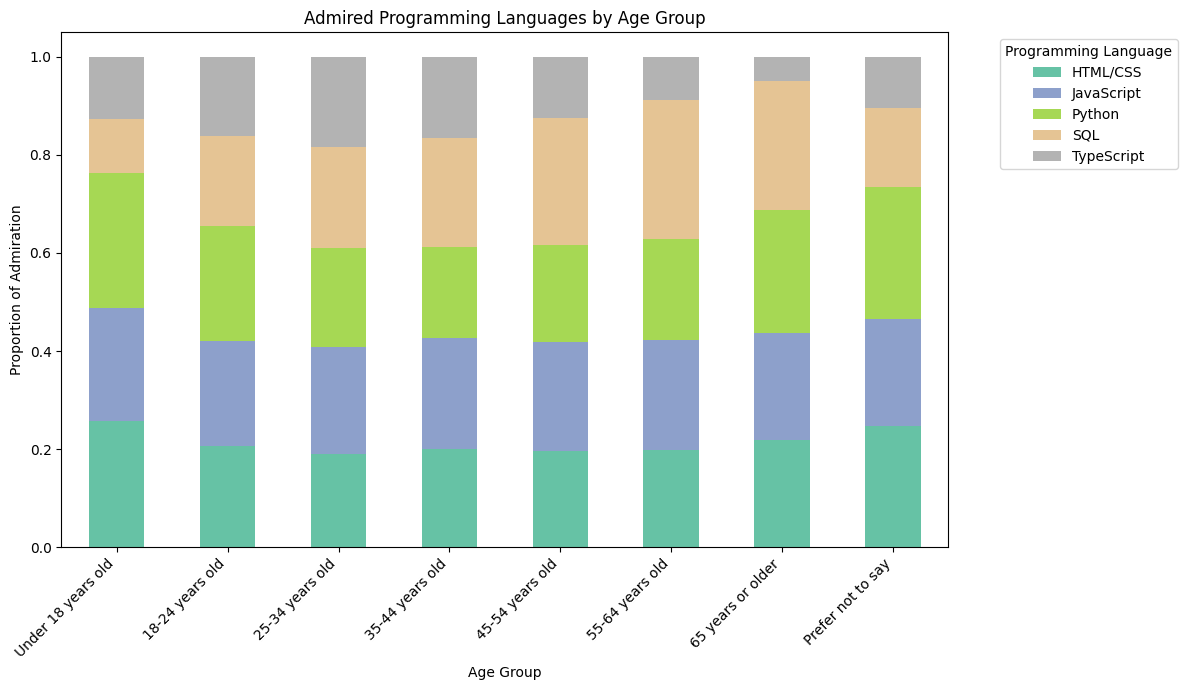

In [17]:
##Write your code here

# Drop missing values in Age and LanguageAdmired
df_clean = df.dropna(subset=['Age', 'LanguageAdmired'])

# Split multiple language entries into separate rows
df_exploded = df_clean.assign(
    LanguageAdmired=df_clean['LanguageAdmired'].str.split(';')
).explode('LanguageAdmired')

# Count top 5 admired languages overall
top_languages = df_exploded['LanguageAdmired'].value_counts().nlargest(5).index

# Filter to only top 5 languages
df_top = df_exploded[df_exploded['LanguageAdmired'].isin(top_languages)]

# Create crosstab of Age vs Admired Languages
crosstab = pd.crosstab(df_top['Age'], df_top['LanguageAdmired'])

# Sort age groups logically
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]
crosstab = crosstab.reindex(age_order)

# Normalize by age group to show proportions
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plot stacked bar chart
crosstab_prop.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set2')

plt.title('Admired Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Admiration')
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_4848/1689535479.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


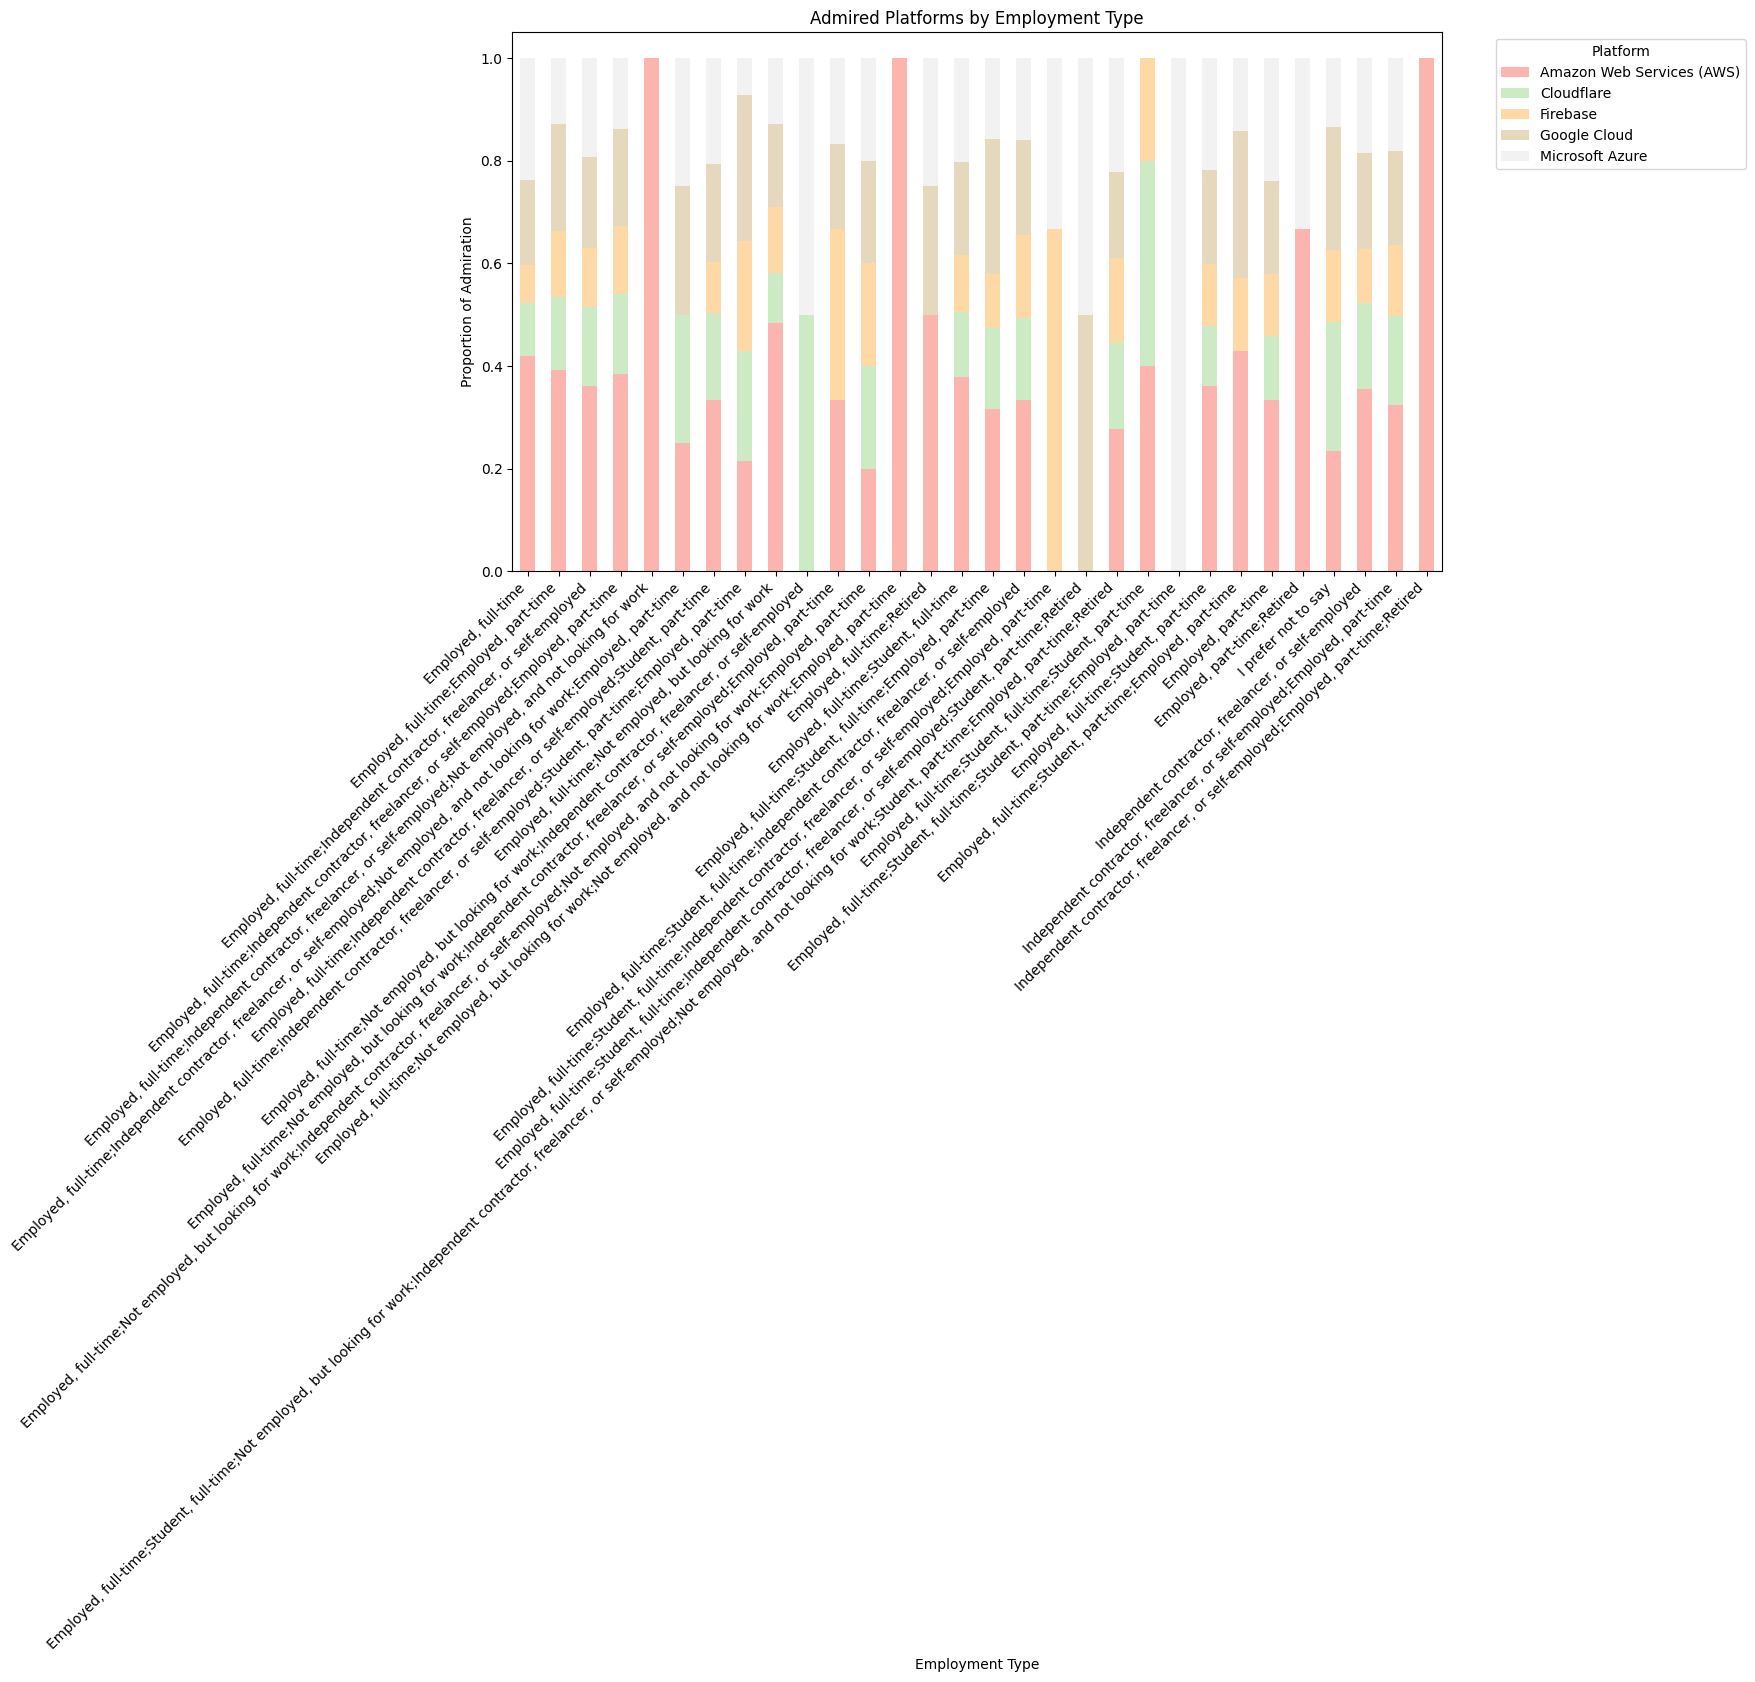

In [19]:
##Write your code here

# Drop rows with missing Employment or PlatformAdmired
df_clean = df.dropna(subset=['Employment', 'PlatformAdmired'])

# Split multiple admired platforms into separate rows
df_exploded = df_clean.assign(
    PlatformAdmired=df_clean['PlatformAdmired'].str.split(';')
).explode('PlatformAdmired')

# Get top 5 admired platforms overall
top_platforms = df_exploded['PlatformAdmired'].value_counts().nlargest(5).index

# Filter to keep only top 5 platforms
df_top = df_exploded[df_exploded['PlatformAdmired'].isin(top_platforms)]

# Create crosstab: Employment vs Admired Platform
crosstab = pd.crosstab(df_top['Employment'], df_top['PlatformAdmired'])

# Normalize rows to get proportions
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)

#Lets take the first 30 rows
crosstab_prop = crosstab_prop.head(30)

# Plot stacked bar chart
crosstab_prop.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Pastel1')

plt.title('Admired Platforms by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Admiration')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
